

> **如何让数据助手读懂你的星球数据？**
> 
> **怎么像数据库查询一样精准获取答案？**
> 
> **想不想一键上传，不用标注数据就可以后台基于模板快速训练其他表格图片？**


**本项目通过一份简单的星球数据, 给你一份轻松数据查询的实现方法！！！**
<br/> 
<br/> 

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/cc39de89f348499eaec174e4593ecc59ac82c362d1cf4797967706063f070808" width='800' height=''></center>

<br/> 
<br/> 


**github地址: [Paddle_Table_Image_Reader](https://github.com/thunder95/Paddle_Table_Image_Reader)**
<br>

**B站视频体验如下：**

<iframe style="width:98%;height: 450px;" src="//player.bilibili.com/player.html?aid=759697895&bvid=BV1B64y1i7GM&cid=385005305&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true"> </iframe>

**b站视频链接：[https://www.bilibili.com/video/BV1B64y1i7GM](https://www.bilibili.com/video/BV1B64y1i7GM)**



## 一、项目背景

本项目是参加【**AI创造营 ：Metaverse启动机之重构现世**】的作品，PaddlePaddle 联合开源聊天机器人框架 Wechaty 和设计师社区 MixLab 带来炫酷科幻创意赛，并由未来事务管理局作为媒体支持，以期为AI算法工程师拓展Conversational AI 应用场景，为 Chatbot 开发者提供AI技术支持平台，为MixLab设计师探索创新构想落地途径。

本项目主要功能是，上传一张表格数据图片，目前暂只支持单表, 通过PP-Structure解析表格模板，提取表格要素信息，再送入到Text2SQL进行训练，最后就可以基于数据库用文本语言的方式查询到自己想要的信息了。

本项目主要挑战是PaddleOCR会有识别上的准确率的问题，text2sql最大的问题就是数据制作麻烦，周期长，同时很难泛化到其他表格。所以本项目的一大创新点，就是编写一个普遍适用的数据生成模板，当解析完成表格元素，自动生成标注数据（可能中间过程有轻微的文字改动，几分钟应该可以搞定），进行训练生成模型，最终基本可以达到实时推理的效果。

本项目还支持一些附加功能, 比如支持数据导出, 查看图片，动态显示回复过程等等。

关于Wechaty的安装和使用请参考我另一篇： [微信医聊自动问答 WeChaty + PaddleHub ](https://aistudio.baidu.com/aistudio/projectdetail/1868162)

<br/>

**参考项目**：

[PaddleNLP开源项目](https://github.com/PaddlePaddle/PaddleNLP)

[PaddleOCR开源项目](https://github.com/PaddlePaddle/PaddleOCR)


## 二、关于WeChaty和PaddleHub

wechaty（https://github.com/wechaty/wechaty）是一款开源的微信SDK，它基于微信公开的API，对接口进行了一系列的封装，提供一系列简单的接口，然后开发者可以在其之上进行微信机器人的开发。
    
这里使用docker脚本可方便快速部署。请将your_token处替换成你的WeChaty token (**puppet_padlocal_xxxxxxxxxxxxx)**

```
export WECHATY_LOG="verbose"
export WECHATY_PUPPET="wechaty-puppet-padlocal"
export WECHATY_PUPPET_PADLOCAL_TOKEN="your_token"

export WECHATY_PUPPET_SERVER_PORT="8080"
export WECHATY_TOKEN="your_token"

docker run -ti \
  --name wechaty_puppet_service_token_gateway \
  --rm \
  -e WECHATY_LOG \
  -e WECHATY_PUPPET \
  -e WECHATY_PUPPET_PADLOCAL_TOKEN \
  -e WECHATY_PUPPET_SERVER_PORT \
  -e WECHATY_TOKEN \
  -p "$WECHATY_PUPPET_SERVER_PORT:$WECHATY_PUPPET_SERVER_PORT" \
  wechaty/wechaty:latest
~                        
```

运行成功后如下图:

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/73f123bb9b37410eb49f834dc512226e014f3f53a77d42888b201833e8ef6942" width='800' height=''></center>

## 三、关于PaddleOCR

**简介**

PaddleOCR旨在打造一套丰富、领先、且实用的OCR工具库，助力使用者训练出更好的模型，并应用落地。

<br>

**特性**

* 超轻量级中文OCR模型，总模型仅8.6M
* 单模型支持中英文数字组合识别、竖排文本识别、长文本识别
* 检测模型DB（4.1M）+识别模型CRNN（4.5M）
* 实用通用中文OCR模型
* 多种预测推理部署方案，包括服务部署和端侧部署
* 多种文本检测训练算法，EAST、DB、SAST
* 多种文本识别训练算法，Rosetta、CRNN、STAR-Net、RARE、SRN
* 可运行于Linux、Windows、MacOS等多种系统

### PP-Structure

所谓版面分析，就是对文档图片中的文本、表格、图片、标题与列表区域进行分类。而表格识别则是基于版面分析出的表格类区域，进行文本的检测与识别，同时还完整的提取表格结构信息，使得表格图片变为可编辑的Excel文件。

版面分析的需求广泛存在，例如金融行业中提取用户申请资质时各类文件的信息；工业界对于实体制造情况的持续跟踪，以及对于发票、各类表单的电子化存储需求；对于个人而言，通过移动设备拍照提取表格或者快速将PDF文档中的表格数据变为可编辑形式的需求也一直存在。而表格识别相比通用识别+后处理，可以节省更多成本。

不管是版面分析还是表格识别，现有方案可大致分为基于图像处理的传统方法和基于深度学习的方法。

<br>
<br>

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e1d05c074bb94d31afc691f06b7e6f28819cb74abb83427e99e41401b2e1e663" width='800' height=''></center>




请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [ ]:
# 安装PP-Structure
!pip install "paddleocr>=2.2"
!pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install beautifulsoup4

### 示例图片：

![](https://ai-studio-static-online.cdn.bcebos.com/cb998ab96fc345ae9eddb9268c63c7f466f1cbd5dadf4542bd25561282292cb1)


In [ ]:
# 表格元素文本识别
!paddleocr --image_dir=/home/aistudio/work/sources/example_table.jpg --type=structure 

In [24]:
# 解析获取的html数据
from bs4 import BeautifulSoup
import re
import json
import pandas as pd

with open('/home/aistudio/work/sources/sample.html') as file_obj:
    html_doc = file_obj.read()
soup = BeautifulSoup(html_doc, 'html.parser')
tb = soup.findAll('table')[0]
columns = []
#表头
for td in  tb.thead.findAll('tr')[0].findAll("td"):
    tmp = td.get_text().replace(" ", "")
    tmp = re.sub(u"\\（.*?）|\\{.*?}|\\[.*?]|\\【.*?】", "", tmp)
    columns.append(tmp)
columns[0] = "星球"

#列名
rows_content = []
pks = []
for row in tb.tbody.findAll('tr'):
    cells = row.findAll('td')
    row_content = []
    for k in range(len(cells)): 
        if k > 0:
            row_content.append(float(cells[k].get_text().replace("°", "")))
           
        else:
            row_content.append(cells[k].get_text())
            pks.append(cells[k].get_text())
    rows_content.append(row_content)

#写入到pandas
data_df = pd.DataFrame(rows_content, columns=columns)
data_df.head

<bound method NDFrame.head of     星球  与太阳的平均距离        质量        体积   轨道倾角  轨道偏心率
0   水星     0.579    0.0500     0.056   7.00  0.206
1   金星     1.082    0.8200     0.856   3.40  0.007
2   地球     1.496    1.0000     1.000   0.00  0.017
3   火星     2.279    0.1100     0.150   1.90  0.093
4   木星   778.000  317.9400  1316.000  13.00  0.048
5   土星    14.270   95.1800   745.000   2.59  0.055
6  天王星    28.700   14.6300    65.200   0.80  0.051
7  海王星    44.960   17.2200    57.100  18.00  0.006
8  只王星    59.460    0.0024     0.009  17.10  0.256>

## 四、基于Pandas数据分析

In [ ]:
#描述统计
data_df.describe()

,与太阳的平均距离,质量,体积,轨道倾角,轨道偏心率
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,103.425111,49.661378,242.819000,7.087778,0.082111
std,253.871614,105.155276,469.540281,7.113357,0.089614
min,0.579000,0.002400,0.009000,0.000000,0.006000
25%,1.496000,0.110000,0.150000,1.900000,0.017000
50%,14.270000,1.000000,1.000000,3.400000,0.051000
75%,44.960000,17.220000,65.200000,13.000000,0.093000
max,778.000000,317.940000,1316.000000,18.000000,0.256000


In [50]:
#设置中文字体
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import numpy as np
font = font_manager.FontProperties(fname='work/sources/simhei.ttf', size=16)

# 设置matplotlib正常显示中文和负号
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


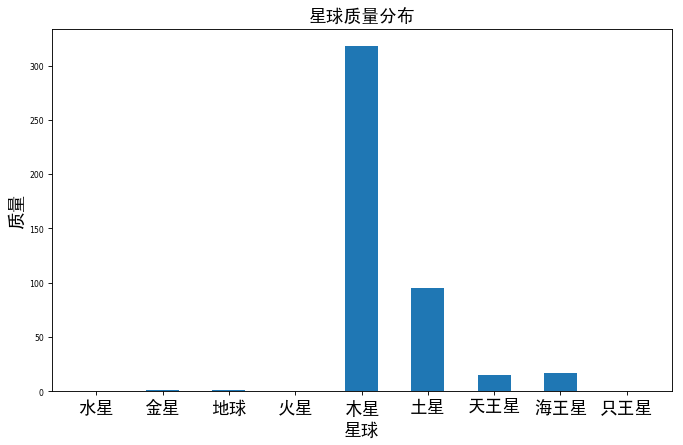

In [ ]:
# 质量柱形图
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(data_df["星球"], data_df["质量"], width=0.5)
plt.title('星球质量分布', fontproperties=font)
plt.xlabel('星球', fontproperties=font)
plt.ylabel('质量', fontproperties=font)
plt.xticks(data_df["星球"], fontproperties=font)
plt.savefig("bar.jpg")
plt.show()


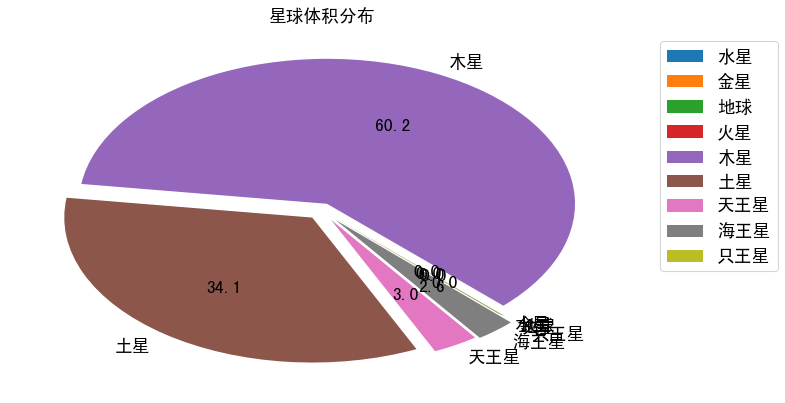

In [ ]:
# 体积饼状图
plt.figure(figsize=(10, 6), dpi=80)
explode = np.linspace(0, 0.1, len(data_df["星球"]))
plt.pie(data_df["体积"], explode=explode, labels=data_df["星球"], autopct='%1.1f', shadow=False, startangle=-45, textprops={'fontproperties':font})
plt.title("星球体积分布", fontproperties=font)
plt.legend(loc='right', bbox_to_anchor=[0.75, 0.4, 0.5, 0.5], prop=font)
plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331:

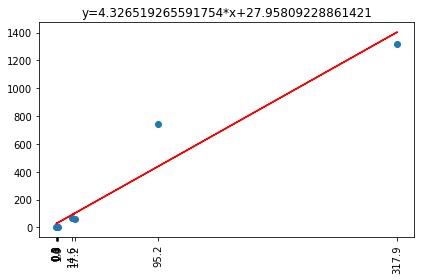

In [51]:
#质量和体积的线性拟合
from scipy.stats import linregress
slope,intercept,r,p,std_err=linregress(data_df["质量"], data_df["体积"])
plt.scatter(data_df["质量"], data_df["体积"])
exp=data_df["质量"]*slope+intercept
plt.plot(data_df["质量"], exp, color="red")
plt.title(f'y={slope}*x+{intercept}')
plt.xticks(data_df["质量"], rotation=90)
plt.tight_layout()
plt.savefig('./trend.jpg')
plt.show()


In [ ]:
#导出csv
data_df.to_csv("data.csv")

## 五、关于TEXT2SQL语义解析任务

语义解析是一种交互式分析技术，其将用户输入的自然语言表述转成可操作执行的语义表示形式，如逻辑表达式（如一阶逻辑表示，lambda表示等）、编程语言（如SQL、python等）、数学公式等。

Text2SQL 是语义解析技术中的一类任务，让机器自动将用户输入的自然语言问题转成可与数据库交互的 SQL 查询语言，实现基于数据库的自动问答能力。

### RAT-SQL模型介绍

RATSQL论文于2019年11月首次发布在arXiv，最近（2020年5月）重新修改提交。算法目前在Spider榜单上最高准确率为65.6%。

论文首先就Schema Encoding和Schema Linking进行了介绍。Schema Encoding顾名思义就是对表结构（表名、列名、列类型、主键、外键等等）进行编码，以便后续模型训练使用。Schema Linking则是要把Question中表述的内容与具体的表名和列名对齐。而这件事并不容易，文中举例如下，Question中提到的model应该是“car_names”这张表里的model，而不是“model_list”表里的model。

要提升Schema Linking的准确率，必须将表结构（schema）和question中的信息同时考虑。但此前的工作（GNN encoder[2]）在encoding时只考虑的schema，未考虑到question中所包含的上下文信息。同时GNN-based的encoding方式，使得关系表示局限于预先定义的graph edges中，限制了模型的表示能力。

RATSQL使用了relation-aware self-attention,同时把显式关系（schema）和隐式关系（question和schema之间的linking）都考虑在encoding中，完善了模型的表示能力。

<br>
<br>

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/68b4f6a913bb4cf499d0f1c6c675a49af522b4181ff843a3b95e1233ac0a355b" width='800' height=''></center>

In [ ]:
#安装
# !unzip ~/data/data103402/Text2SQL-BASELINE.zip -d ./
!pip install -r Text2SQL-BASELINE/requirements.txt
%cd ~/Text2SQL-BASELINE/ERNIE
!python setup.py develop
# %cd ~/Text2SQL-BASELINE/data
# !bash download_ernie1.0.sh
# !bash download_trained_model.sh

In [ ]:
#生成db_schema.json以及db_content.json
!python ~/work/sources/create_dbjson.py

created schema:  ['星球', '与太阳的平均距离', '质量', '体积', '轨道倾角', '轨道偏心率']


In [ ]:
#生成训练数据
!python ~/work/sources/create_list.py

In [ ]:
#数据预处理
%cd ~/Text2SQL-BASELINE

!bash ./run.sh ./script/schema_linking.py \
        -s data/db_schema.json \
        -c data/db_content.json \
        -o data/match_values_train.json \
        -f nl2sql \
        data/train.json  --is-train

!bash ./run.sh ./script/schema_linking.py \
        -s data/db_schema.json \
        -c data/db_content.json \
        -o data/match_values_dev.json \
        -f nl2sql \
        data/dev.json

!bash ./run.sh ./script/text2sql_main.py \
        --mode preproc \
        --config conf/my_data.jsonnet \
        --data-root data/ \
        --is-cached false \
        --is-test false \
        --output data/preproc

**初步训练结果比较过拟合， 数据预测明显偏向多样本，泛化效果也不太好，做了一下优化：**
1. 均衡数据样本
2. 适当扩充了数据
3. 使用了官方预训练模型, 因数据样本太少，效果反而不好

In [9]:
#模型训练
!bash ./train.sh 10 output/train  --config conf/my_data.jsonnet --data-root data/preproc

In [12]:
#模型推理
%cd ~/Text2SQL-BASELINE
import json
txt_list = [
    "能帮我查一下火星的质量吗", 
    "土星的体积是多少",
    "你好啊我想要了解一下金星的体积和质量是多少",
    "请帮我查下木星的资料",
    "麻烦问下，水星和土星的轨道倾角分别是多少",
    "哪些体积超过5啊",
    "有没有哪个星球质量低于1",
    "你帮我查一下与太阳的的平均距离是1.496都是哪些星球啊",
    "体积小于0.2或者质量小于0.1的星球是什么",
    "有没有哪个星球体积和质量都低于0.1",
    "请问全部星球的体积是多少",
    "请问全部星球的质量平均是多少",
    "请问哪个星球的体积最大？",
    "请问哪个星球的质量最小？",
    "轨道偏心率大于0.2的星球一共有几个",
    "麻烦告诉我，有多少星球是体积超过1而且轨道偏心率小于0.05的？"
    ]

test_data = []
qidx = 1
for t in txt_list:
    test_data.append(
        {
        "db_id": "single_table",
        "question": t,
        "question_id": "qid" + str(qidx),
        "sql": "",
        "query": ""
        }
    )
    qidx += 1

with open("data/test.json","w") as f:
    json.dump(test_data,  f, ensure_ascii=False,  indent=4)

#生成
!bash ./run.sh ./script/schema_linking.py \
        -s data/db_schema.json \
        -c data/db_content.json \
        -o data/match_values_test.json \
        -f nl2sql \
        data/test.json

#预处理
!bash ./run.sh ./script/text2sql_main.py \
        --mode preproc \
        --config conf/my_data.jsonnet \
        --data-root data/ \
        --is-cached false \
        --is-test true \
        --output data/preproc

#推理
!bash ./run.sh ./script/text2sql_main.py --mode infer \
         --config conf/my_data.jsonnet \
         --data-root data/preproc \
         --test-set data/preproc/test.pkl \
         --init-model-param output/train/epoch037_acc37.0000/model.pdparams \
         --output output/result.json

In [13]:
#查看推理结果
with open("output/result.json",'r') as load_f:
    load_dict = json.load(load_f)
    print(load_dict)

[{'question': '能帮我查一下火星的质量吗', 'sql': 'SELECT single_table.质量 FROM single_table WHERE single_table.星球 = "火星"'}, {'question': '土星的体积是多少', 'sql': 'SELECT single_table.体积 FROM single_table WHERE single_table.星球 = "土星"'}, {'question': '你好啊我想要了解一下金星的体积和质量是多少', 'sql': 'SELECT single_table.质量 FROM single_table WHERE single_table.质量 = "金星"'}, {'question': '请帮我查下木星的资料', 'sql': 'SELECT * FROM single_table WHERE single_table.星球 = "木星"'}, {'question': '麻烦问下，水星和土星的轨道倾角分别是多少', 'sql': 'SELECT single_table.轨道倾角 FROM single_table WHERE single_table.星球 = "水星" OR single_table.星球 = "土星"'}, {'question': '哪些体积超过5啊', 'sql': 'SELECT single_table.星球 FROM single_table WHERE single_table.体积 != "5"'}, {'question': '有没有哪个星球质量低于1', 'sql': 'SELECT single_table.星球 FROM single_table WHERE single_table.星球 != "1"'}, {'question': '你帮我查一下与太阳的的平均距离是1.496都是哪些星球啊', 'sql': 'SELECT single_table.星球 FROM single_table WHERE single_table.与太阳的平均距离 = "1.496"'}, {'question': '体积小于0.2或者质量小于0.1的星球是什么', 'sql': 'SELECT Count(single_table.

## 六、SQLITE数据库搭建

**SQLite是一种嵌入式数据库**，它的数据库就是一个文件。由于SQLite本身是C写的，而且体积很小，所以，经常被集成到各种应用程序中，甚至在iOS和Android的App中都可以集成。
Python就内置了SQLite3，所以，在Python中使用SQLite，不需要安装任何东西，直接使用。
在使用SQLite前，我们先要搞清楚几个概念：
表是数据库中存放关系数据的集合，一个数据库里面通常都包含多个表，比如学生的表，班级的表，学校的表，等等。表和表之间通过外键关联。
要操作关系数据库，首先需要连接到数据库，一个数据库连接称为Connection；
连接到数据库后，需要打开游标，称之为Cursor，通过Cursor执行SQL语句，然后，获得执行结果。
Python定义了一套操作数据库的API接口，任何数据库要连接到Python，只需要提供符合Python标准的数据库驱动即可。
由于SQLite的驱动内置在Python标准库中，所以我们可以直接来操作SQLite数据库。

In [ ]:
!pip install sqlalchemy

In [25]:
#初始化数据库和创建表
from sqlalchemy import create_engine
engine = create_engine('sqlite:///save_pandas.db', echo=True)
sqlite_connection = engine.connect()
data_df.to_sql("single_table", sqlite_connection, if_exists='replace')

2021-08-08 16:30:35,284 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("single_table")
2021-08-08 16:30:35,296 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-08 16:30:35,298 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("single_table")
2021-08-08 16:30:35,298 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-08 16:30:35,301 INFO sqlalchemy.engine.Engine 
CREATE TABLE single_table (
	"index" BIGINT, 
	"星球" TEXT, 
	"与太阳的平均距离" FLOAT, 
	"质量" FLOAT, 
	"体积" FLOAT, 
	"轨道倾角" FLOAT, 
	"轨道偏心率" FLOAT
)


2021-08-08 16:30:35,302 INFO sqlalchemy.engine.Engine [no key 0.00055s] ()
2021-08-08 16:30:35,307 INFO sqlalchemy.engine.Engine COMMIT
2021-08-08 16:30:35,308 INFO sqlalchemy.engine.Engine CREATE INDEX ix_single_table_index ON single_table ("index")
2021-08-08 16:30:35,308 INFO sqlalchemy.engine.Engine [no key 0.00072s] ()
2021-08-08 16:30:35,314 INFO sqlalchemy.engine.Engine COMMIT
2021-08-08 16:30:35,316 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-08 16:30:35,318 I

In [39]:
#遍历sql语句查询
with open("output/result.json",'r') as load_f:
    load_dict = json.load(load_f)
    #print(load_dict)
    for i in (range(len(load_dict))):
        test_sql = load_dict[i]["sql"]
        cursor = engine.execute(test_sql)      #执行sql语句
        sql_rs = []
        for row in cursor:
            tmp_rs = []
            for k in range(len(row)):
                tmp_rs.append(row[k])
            print(tmp_rs)
            sql_rs.append(tmp_rs)
        
        load_dict[i]["answer"] = sql_rs

In [47]:
for i in range(len(load_dict)):
    print(i, "=====>", load_dict[i])

## 七、生成结果图片

In [48]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

for i in range(len(load_dict)):
    strs = "问题: " + load_dict[i]["question"] + "\n" + "SQL: " + load_dict[i]["sql"] + "\n" + "答案： " + str(load_dict[i]["answer"])
    imageFile = "/home/aistudio/work/sources/universe2.jpg"""

    #初始化参数
    x = 20   #横坐标（左右）
    y = 20   #纵坐标（上下）
    word_size = 20 #文字大小
    word_css  = "/home/aistudio/work/sources/simhei.ttf" 
    font = ImageFont.truetype(word_css, word_size)
    
    #分割得到数组
    im1=Image.open(imageFile) #打开图片
    draw = ImageDraw.Draw(im1)
    draw.text((x, y),strs,(255,255,0),font=font)
    im1.save("/home/aistudio/work/for_wechaty/text2sql_imgs/rsult_" + str(i)+ ".jpg") 
    del draw
    im1.close()

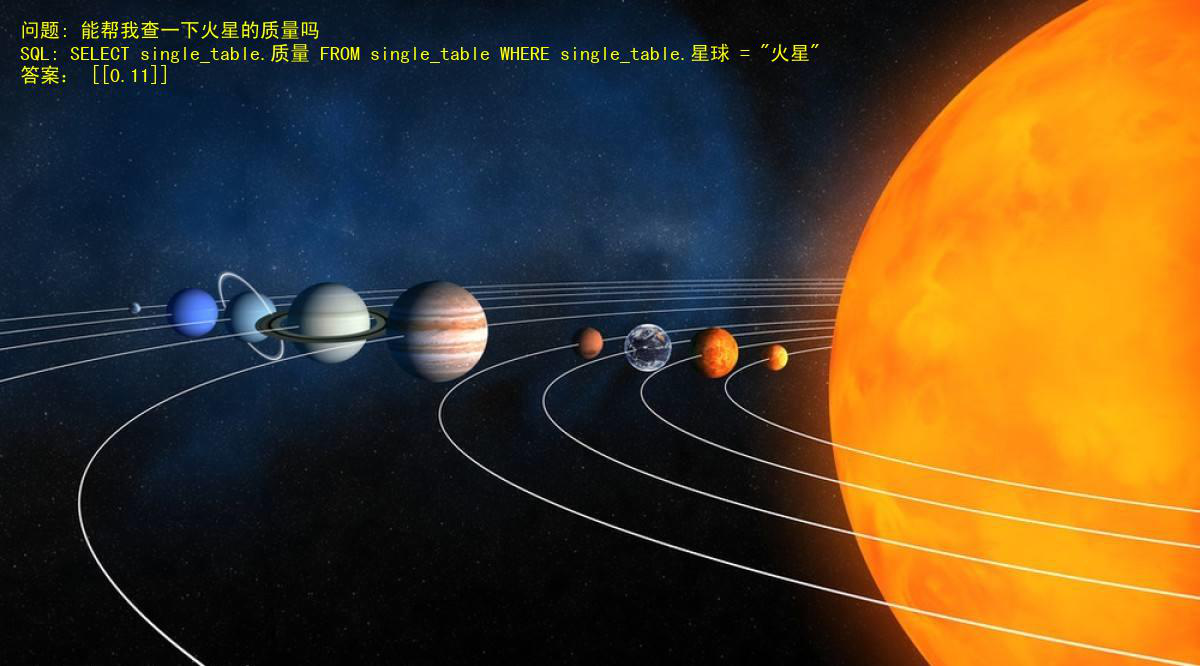

In [45]:
display(Image.open("/home/aistudio/work/for_wechaty/text2sql_imgs/rsult_0.jpg"))

## 八、将上述代码在本地部署（Wechaty +Paddle）


![](https://ai-studio-static-online.cdn.bcebos.com/03e47ac4b45c4efbb006f8f78586ba649446db1e044148d3a1a79ba0b24c5565)

![](https://ai-studio-static-online.cdn.bcebos.com/6b5aab4beb77463dbd8099c4436b1b4ac33ea73bce7d453094a082107e49cfd3)


## 九、总结

* PP-Structure效果还是不错的，准确度和泛化能力方面还是有不少提升空间。
* 项目中还有很多不足， 端到端推理时间和过程比较繁杂，不易于落地部署，后期整体可以将这个pipeline好好优化。
* 模板生成训练数据还是比较有限,，没能做到完全自动化生成，而且非常不均衡，需要优化。
* 训练的数据集比较有限，导致泛化能力比较差。
* 时间有限，训练得也不充分，调参也没进一步优化, 后续好好改进。
* 查询结果应转化为更易于人类理解的结果, 暂时没有完善!


**~~~~~~~~~~如果喜欢，请帮我star, fork, 关注, 一键三连！！！**

**关于作者**

PaddlePaddle开发爱好者

我在AI Studio上获得钻石等级，点亮10个徽章，来互关呀~ https://aistudio.baidu.com/aistudio/personalcenter/thirdview/89442